In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [85]:
wd = pd.read_csv('Wd_WD_Hourly.csv')
wd

,Date,Time (HH:MM),Wind Speed (m/s),Wind Direction (Deg.)
0,27-03-2019,00:00,1.0,270.0
1,27-03-2019,00:30,1.0,270.0
2,27-03-2019,01:00,1.0,270.0
3,27-03-2019,01:30,1.0,280.0
4,27-03-2019,02:00,1.0,290.0
...,...,...,...,...
24763,02-09-2020,21:30,1.0,280.0
24764,02-09-2020,22:00,1.0,280.0
24765,02-09-2020,22:30,1.0,210.0
24766,02-09-2020,23:00,1.0,140.0


In [5]:
ws = wd["Wind Speed (m/s)"]

In [6]:
ws

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
24763    1.0
24764    1.0
24765    1.0
24766    1.0
24767    1.0
Name: Wind Speed (m/s), Length: 24768, dtype: float64

(array([ 9300., 12408.,  2679.,   360.,    21.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. ]),
 <BarContainer object of 5 artists>)

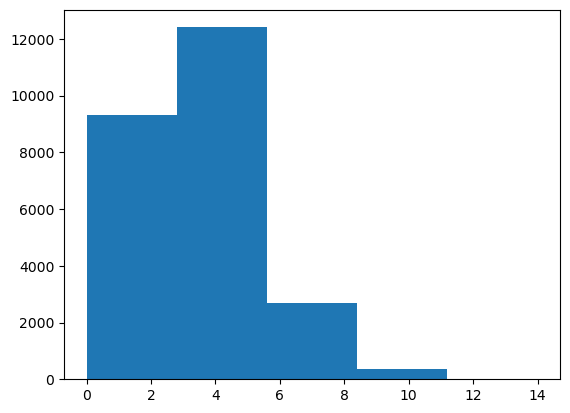

In [7]:
plt.hist(ws, bins =5)

In [17]:
wd.columns

Index(['Date', 'Time (HH:MM)', 'Wind Speed (m/s)', 'Wind Direction (Deg.)',
       'Category'],
      dtype='object')

In [58]:


def categorize_data(df, to_classify, Categories):
    for index, row in df.iterrows():
        value = row[to_classify]
        if value <= Categories[0]:
            df.at[index, "Cat_ws"] = 1
        elif Categories[0] < value <= Categories[1]:
            df.at[index, "Cat_ws"] = 2
        elif Categories[1] < value <= Categories[2]:
            df.at[index, "Cat_ws"] = 3
        elif Categories[2] < value <= Categories[3]:
            df.at[index, "Cat_ws"] = 4


In [59]:
# breakpoints = [90.0,180.0, 270.0, 360.0]
ws_breakpoints = [3.0,6.0,9.0,12.0]
categorize_data(df= wd, to_classify= 'Wind Speed (m/s)', Categories= ws_breakpoints)

In [64]:
from datetime import date
from datetime import datetime

In [69]:
wd['Date']

0       2019-03-27
1       2019-03-27
2       2019-03-27
3       2019-03-27
4       2019-03-27
           ...    
24763   2020-02-09
24764   2020-02-09
24765   2020-02-09
24766   2020-02-09
24767   2020-02-09
Name: Date, Length: 24768, dtype: datetime64[ns]

In [77]:
wd['Time'] = pd.to_datetime(wd['Time (HH:MM)'], format = "%H:%M")

In [88]:
wd['Datetime'] = wd['Date'] + ' ' + wd['Time (HH:MM)']

In [90]:
wd['Date_time'] = pd.to_datetime(wd['Datetime'], format = "%d-%m-%Y  %H:%M")  

In [93]:
wd.columns

Index(['Date', 'Time (HH:MM)', 'Wind Speed (m/s)', 'Wind Direction (Deg.)',
       'Datetime', 'Date_time'],
      dtype='object')

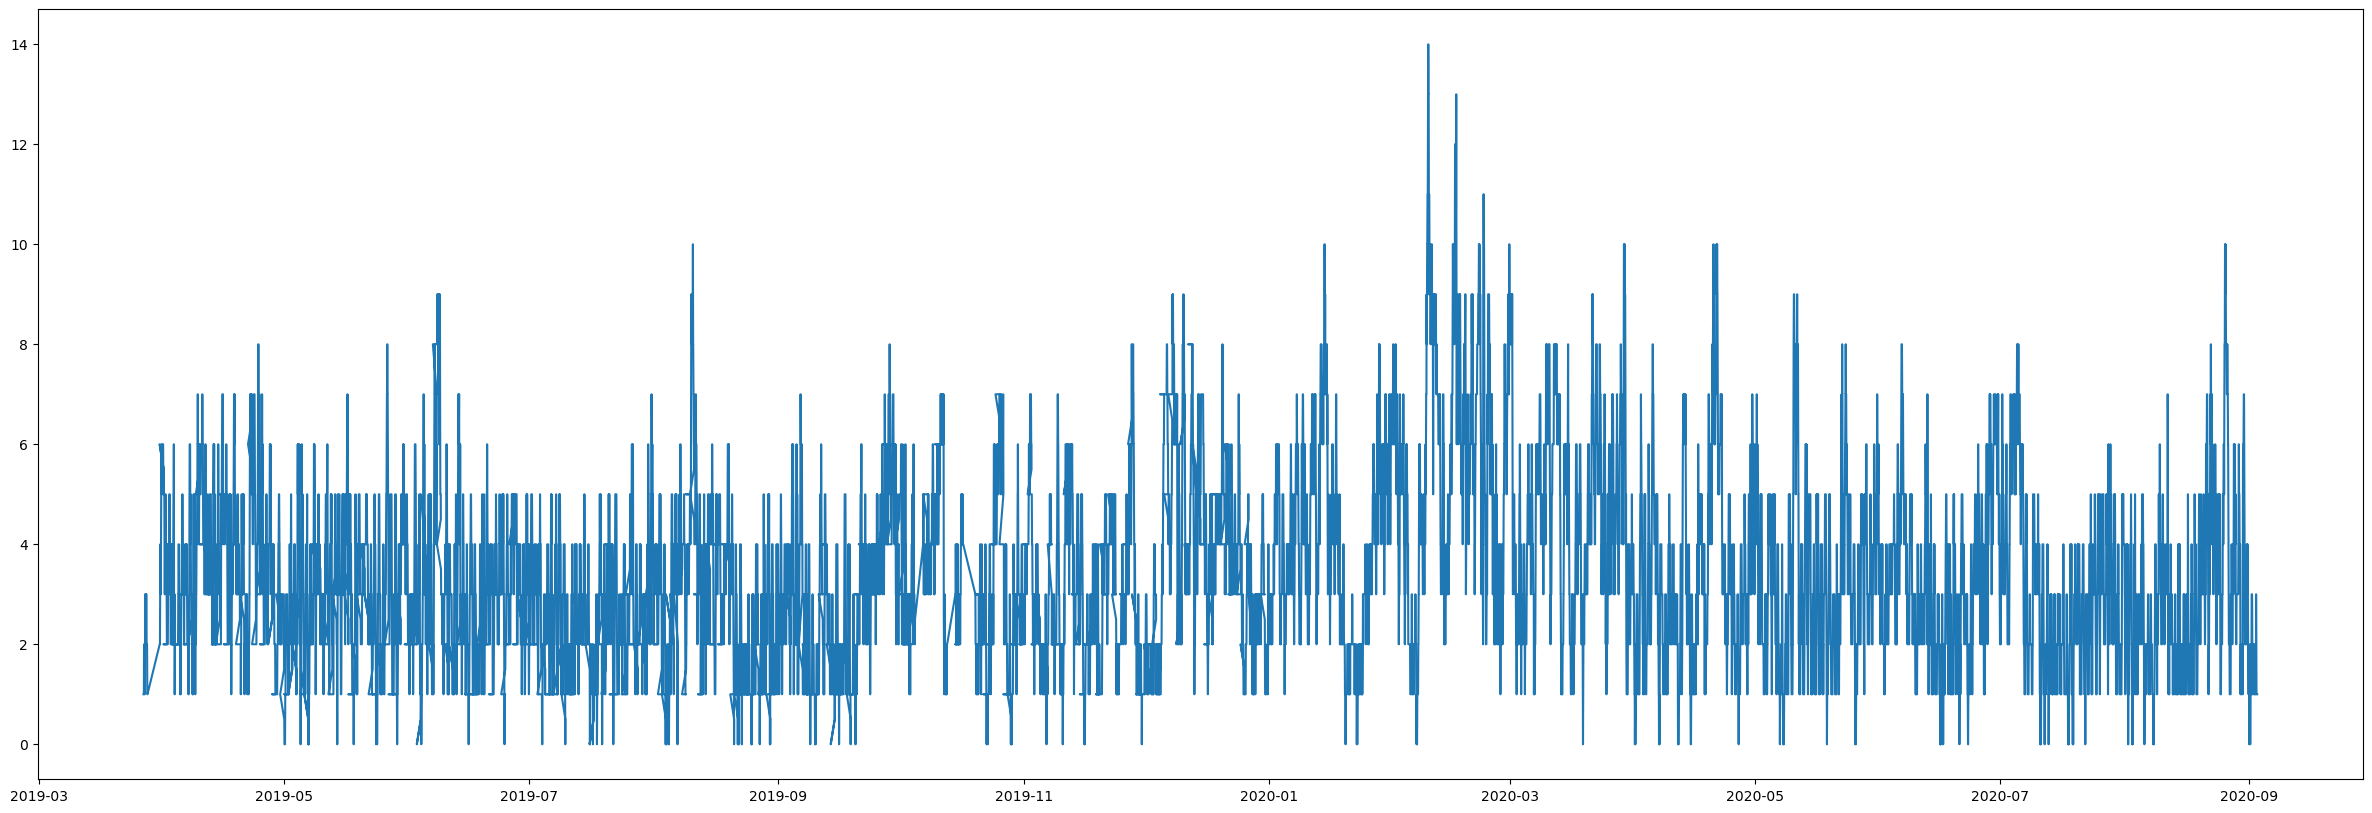

In [97]:
fig = plt.subplots(figsize = (30,10))
plt.plot(wd['Date_time'], wd['Wind Speed (m/s)'])

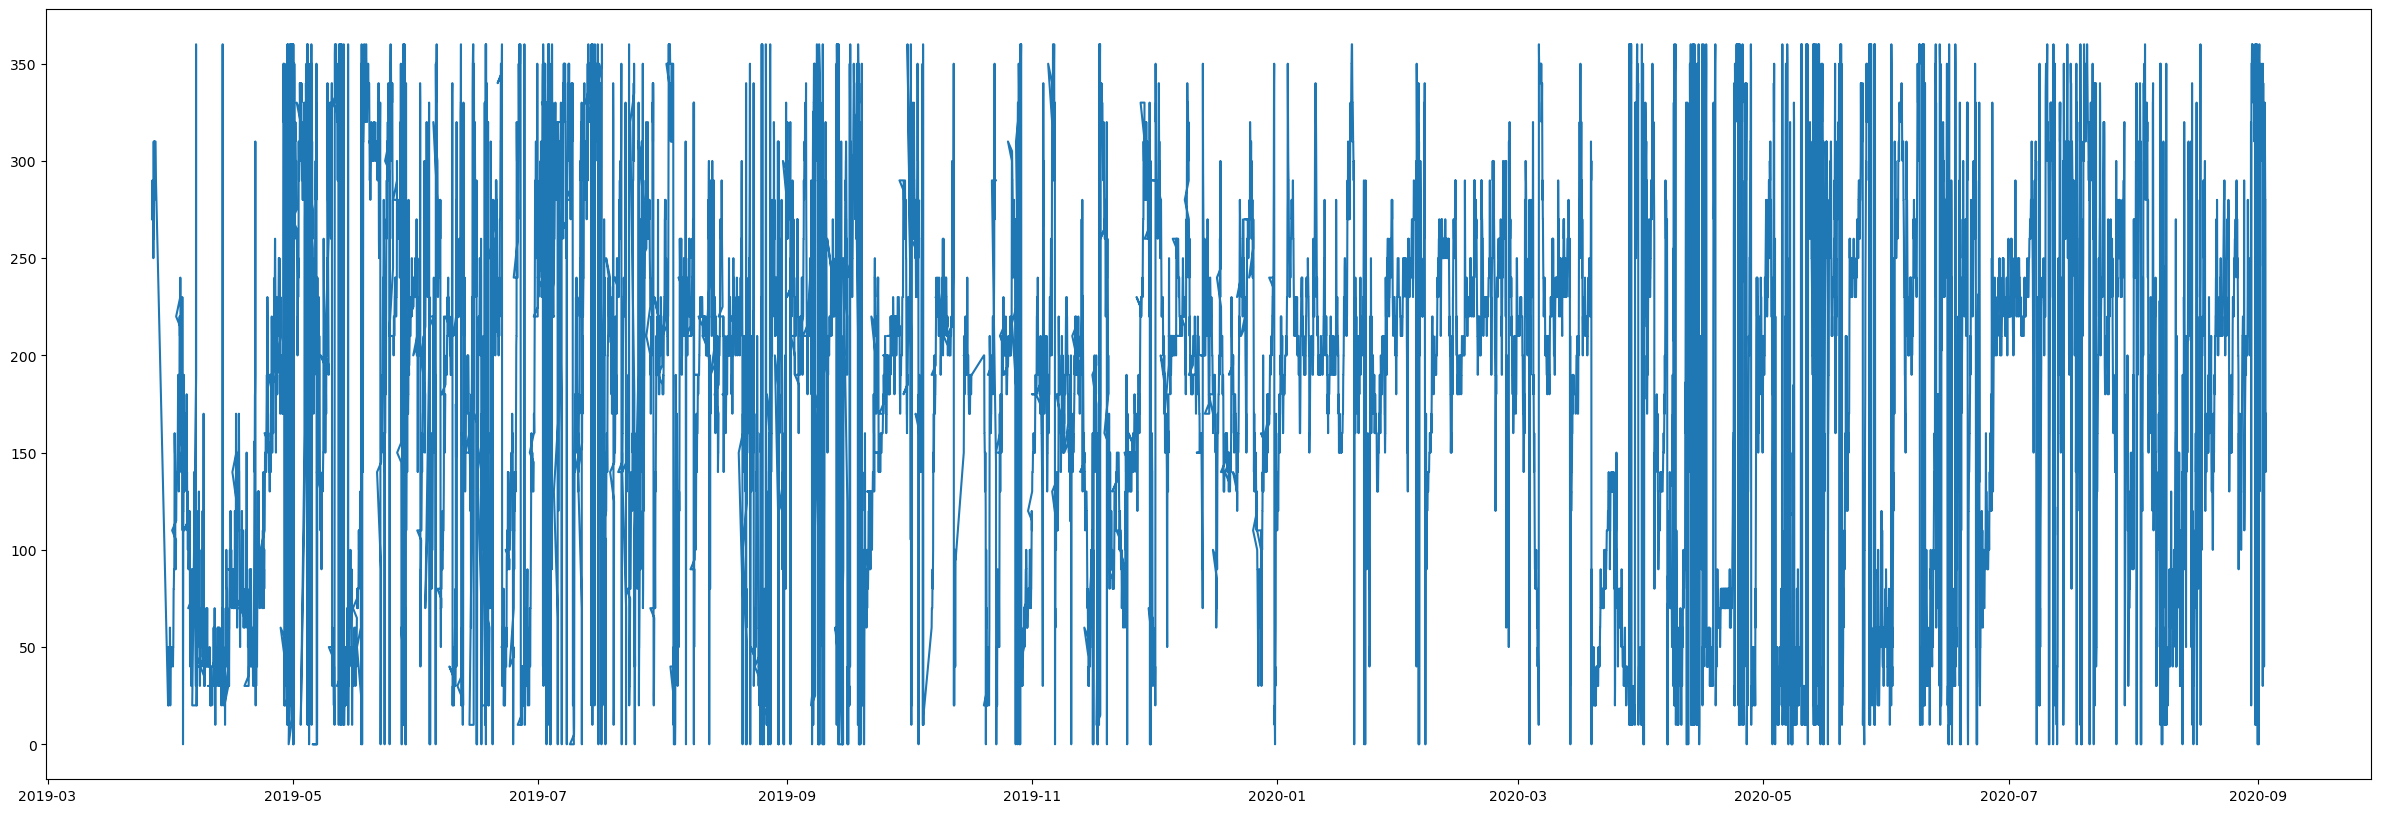

In [99]:
fig = plt.subplots(figsize = (30,10))
plt.plot(wd['Date_time'], wd['Wind Direction (Deg.)'])

(array([ 350., 3519., 5431., 5269., 4452., 2687., 1543.,  828.,  379.,
         216.,   56.,   21.,    7.,   10.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <BarContainer object of 14 artists>)

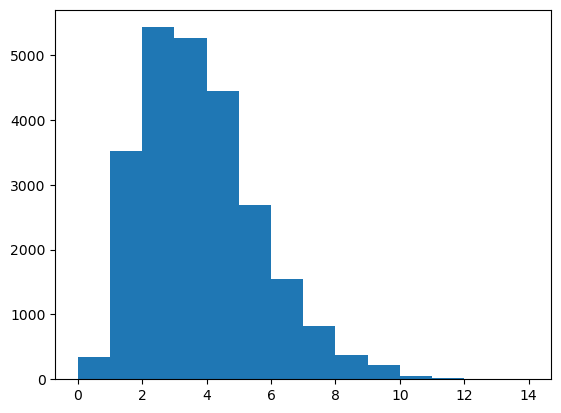

In [121]:
plt.hist(wd['Wind Speed (m/s)'], bins = 14)

C:\Users\Ashutosh Umale\AppData\Local\Temp\ipykernel_24060\1661883732.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1500x2000 with 0 Axes>

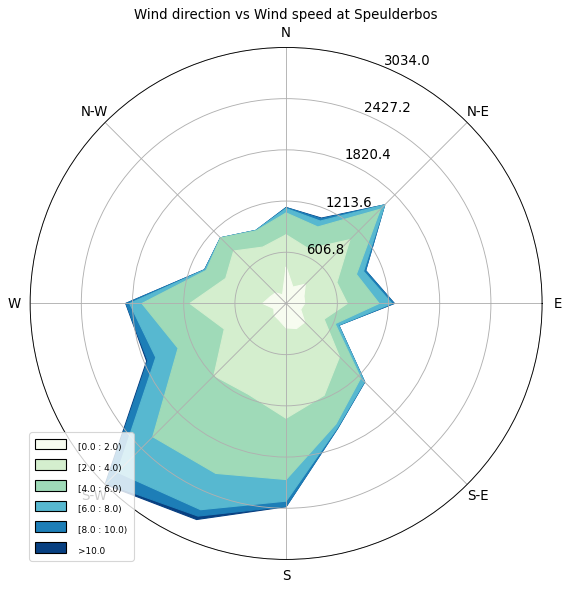

In [135]:
import pandas as pd
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Sample data

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,20))
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 30
plt.rc('font', size=MEDIUM_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

# Plot wind rose
ax = WindroseAxes.from_ax()
# ax.bar(wd['Wind Direction (Deg.)'], wd['Wind Speed (m/s)'], bins= [0.0, 3.0,6.0,9.0,12.0],  normed=True, opening=0.8, edgecolor='white', cmap = cm.hot)
ax.contourf(wd['Wind Direction (Deg.)'], wd['Wind Speed (m/s)'], bins= np.arange(0.0,12.0, 2), cmap = cm.GnBu)
ax.set_legend()
# ax.set_xlabel('Wind Direction (Deg.)', fontsize=16)
# ax.set_ylabel('Wind Speed (m/s)', fontsize=16)
plt.title('Wind direction vs Wind speed at Speulderbos')
plt.tight_layout()
plt.savefig("ws_vs_wd_Radar.png", dpi = 400)
plt.show()




C:\Users\Ashutosh Umale\AppData\Local\Temp\ipykernel_24060\2099206978.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


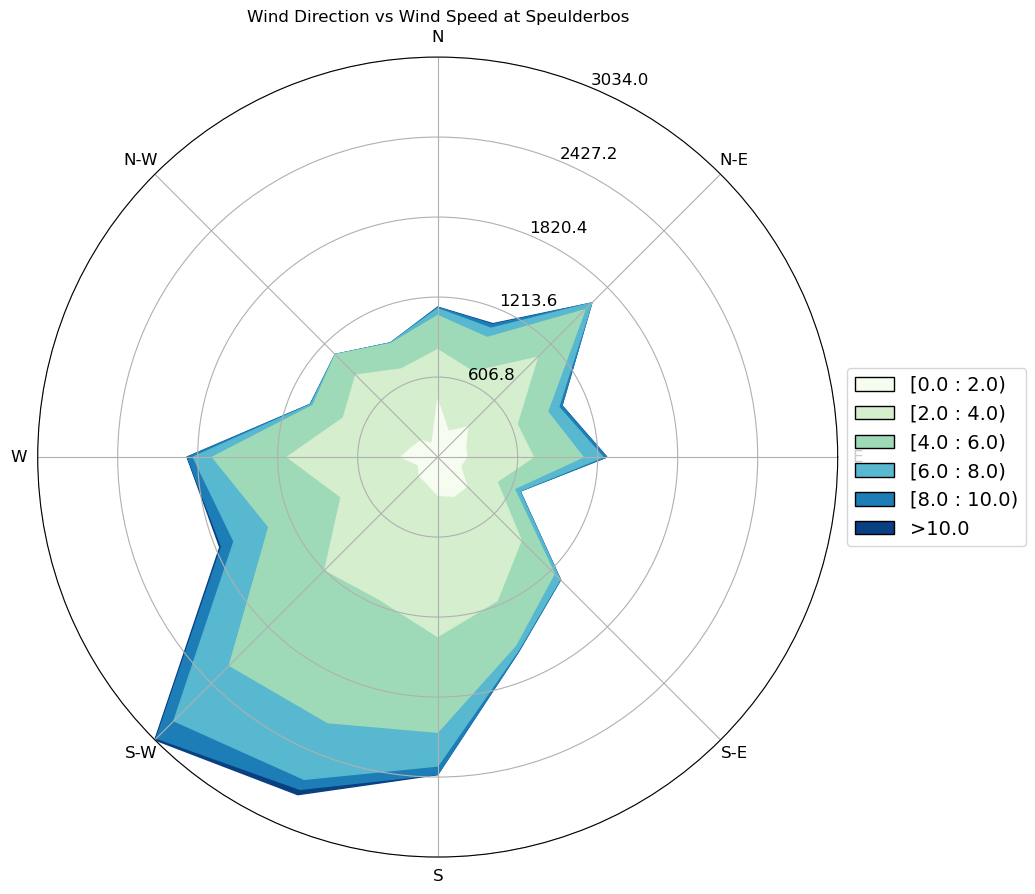

In [148]:
# import pandas as pd
# from windrose import WindroseAxes
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np


# Set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 30

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Plot wind rose
fig = plt.figure(figsize=(15, 10))
ax = WindroseAxes.from_ax(fig=fig)
ax.contourf(wd['Wind Direction (Deg.)'], wd['Wind Speed (m/s)'], bins=np.arange(0.0, 12.0, 2), cmap=cm.GnBu)

# Adjust legend position
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set labels and title
plt.title('Wind Direction vs Wind Speed at Speulderbos')

# Save the figure
plt.tight_layout()
plt.savefig("Ws_vs_Wd_Radar.png", dpi=400)

# Show the plot
plt.show()
